#  Unit 2.2 Data Compression, plus Images Lab
> Learning about Lossy and Lossless compression.  Lab will perform alterations on images, manipulate RGB values, and reduce the number of pixels.
- toc: true
- image: /images/python.png
- categories: []
- type: ap
- week: 22

![Smiley](Screen Shot 2023-03-06 at 1.05.22 PM.png)

## Enumerate Big Ideas from
> The [Image Lab Project](https://csp.nighthawkcodingsociety.com/starter/rgb/) contains a plethora of College Board Unit 2 and Unit 3 concepts. Enumerate some of the big ideas vocab ...
- Data compression is the reduction of the number of bits needed to represent data
- Data compression is used to save transmission time and storage space
- Lossy data can reduce data but the original data is not recovered
- Lossless data can be restored and recovered

## Image Files and Size
> Here are some [Images Files](https://github.com/nighthawkcoders/nighthawk_csp/tree/master/starter/static/img).  WGet some of these files, load them on your machine.   Describe some of the properties of the files.  Describe files that are similar, but different ...
- File Type, PNG and JPG are two types used in this lab
- Size, height and width, number of pixels
- Visual perception, lossy compression

## Python Libraries used in Images Lab

### numpy
> [Numpy](https://numpy.org/) is described as "The fundamental package for scientific computing with Python".  In the Image Lab, a Numpy array is created from the image data in order to access and/or change the RGB values of the pixels.

### PIL (Python Image Library)
> [Pillow or PIL](https://pillow.readthedocs.io/en/stable/) add the ability to work with images in Python.  [Geeks for Geeks](https://www.geeksforgeeks.org/working-images-python/?ref=lbp) show some ideas on working with images.  

### base64
> Data abstraction is in play when we save files.  It is common in working with files to refer to file formats as Image formats, Audio formats, and Video formats, all of these are often called ***Binary File formats**.   In Web Application like Chrome, Safari, Edge they all focus on the usage of HTTP, or text file display like HTML.  Thus, [base64](https://en.wikipedia.org/wiki/Base64) utilities convert binary encoded data (8-bit, ASCII/Unicode/Number abstractions) into a text encoded scheme 0f (24 bits, 6-bit Base64 digits).  Thus base64 is used to transport and embed binary images into textual assets such as HTML and CSS.
- Look at table on Base64 pages.  How is this similar to Binary and Hexadecimal?
- Translate first 3 letters of your name to Base64.

### io, BytesIO
> Input and Output (I/O) is a fundamental of all Computer Programming. Input/output (I/O) buffering is a technique used to optimize I/O operations.  In large quantities of data, how many frames of input the server currently has queued is the buffer.  Buffering is sometimes implemented directly in hardware or other times it is a combination of hardware and software.  
- Where have you been a consumer of buffering?  
- From your consumer experience, what effects have you experienced from buffering?  
- How do these effects apply to images?


### pathlib
> File paths are different on Windows versus Mac and Linux.  This can cause problems in a project as you work and deploy on different Operating Systems (OS's), pathlib is a solution to this problem.  Enumerate difference in shell and file paths on Mac versus Windows using shell commands ls, cd, pwd ...
-
-
-


In [1]:
from PIL import Image, ImageDraw, ImageFilter
import numpy
import base64
from io import BytesIO
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f


# image (PNG, JPG) to base64 conversion (string), learn about base64 on wikipedia https://en.wikipedia.org/wiki/Base64
def image_base64(img, img_type):
    with BytesIO() as buffer:
        img.save(buffer, img_type)
        return base64.b64encode(buffer.getvalue()).decode()


# formatter preps base64 string for inclusion, ie <img src=[this return value] ... />
def image_formatter(img, img_type):
    return "data:image/" + img_type + ";base64," + image_base64(img, img_type)


# color_data prepares a series of images for data analysis
def image_data(path=Path("static/img/"), images=None):  # path of static images is defaulted
    if images is None:  # color_dict is defined with defaults
        images = [
            {'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano-256.jpg"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "clouds-impression.png"}
        ]
    # gather analysis data and meta data for each image, adding attributes to each row in table
    for image in images:
        # File to open
        filename = path / image['file']  # file with path

        # Image open return PIL image object
        img_object = Image.open(filename)

        # Python Image Library operations
        image['format'] = img_object.format
        image['mode'] = img_object.mode
        image['size'] = img_object.size

        # Hacks here for images https://www.tutorialspoint.com/python_pillow/index.htm
        # use the open img_object!!!
        img_object = img_object.filter(ImageFilter.GaussianBlur)

        # Conversion of original Image to Base64, a string format that serves HTML nicely
        image['base64'] = image_formatter(img_object, image['format'])

        # Get data, use Numpy is used to access to data
        img_data = img_object.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
        image['data'] = numpy.array(img_data)
        image['hex_array'] = []
        image['binary_array'] = []
        image['gray_data'] = []

        # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
        for pixel in image['data']:
            # hexadecimal conversions
            hex_value = hex(pixel[0])[-2:] + hex(pixel[1])[-2:] + hex(pixel[2])[-2:]
            hex_value = hex_value.replace("x", "0")
            image['hex_array'].append("#" + hex_value)
            # binary conversions
            bin_value = bin(pixel[0])[2:].zfill(8) + " " + bin(pixel[1])[2:].zfill(8) + " " + bin(pixel[2])[2:].zfill(8)
            image['binary_array'].append(bin_value)

            # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
            average = (pixel[0] + pixel[1] + pixel[2]) // 3  # integer division
            if len(pixel) > 3:
                image['gray_data'].append((average, average, average, pixel[3]))
            else:
                image['gray_data'].append((average, average, average))
        # end for loop for pixels

        # Conversion of modified Image to Base64
        img_object.putdata(image['gray_data'])
        image['base64_GRAY'] = image_formatter(img_object, image['format'])

    # end for loop for images
    return images  # list is returned with all the attributes for each image in a dictionary


# run this as standalone tester to see sample data printed in terminal
if __name__ == "__main__":
    local_path = Path("../starter/static/img/")
    images = image_data(local_path)  # path of local run
    for image in images:
        # print some details about the image so you can validate that it looks like it is working
        # meta data
        print("---- meta data -----")
        print(image['label'])
        print(image['format'])
        print(image['mode'])
        print(image['size'])
        # data
        print("----  data  -----")
        print(image['data'])
        print("----  gray data  -----")
        print(image['gray_data'])
        print("----  hex of data  -----")
        print(image['hex_array'])
        print("----  bin of data  -----")
        print(image['binary_array'])
        # base65
        print("----  base64  -----")
        print(image['base64'])

        # do so things to image that are not in image_info
        filename = local_path / image['file']
        img_object = Image.open(filename)

        # mess with the image
        img_object = img_object.transpose(Image.FLIP_TOP_BOTTOM)
        img_object = img_object.filter(ImageFilter.RankFilter)
        draw = ImageDraw.Draw(img_object)
        draw.text((0, 0), "Size is {0} X {1}".format(*image['size']))  # draw in image

        # open on desktop
        img_object.show()

    print()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alyssaringler/alyssas_fastpages-1/_notebooks/starter/static/img/lassen-volcano-256.jpg'

### Hacks
![alt text](DataCompression.png)

---- meta data -----
Venus
Internet
JPEG
RGB
Original size:  (768, 1024)
Scaled size:  (320, 426)
-- original image --



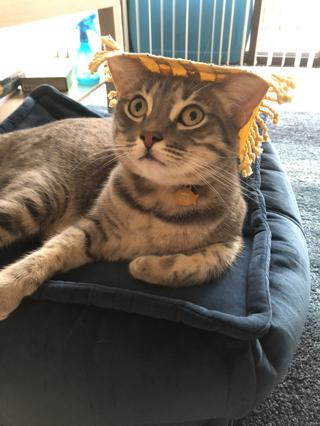

--- red image ----



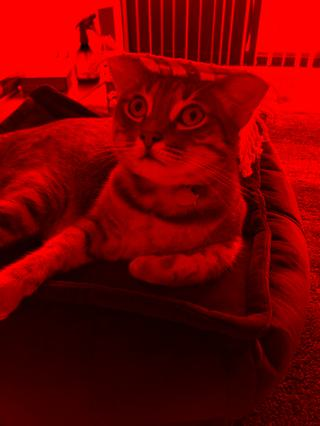

--- green image ----



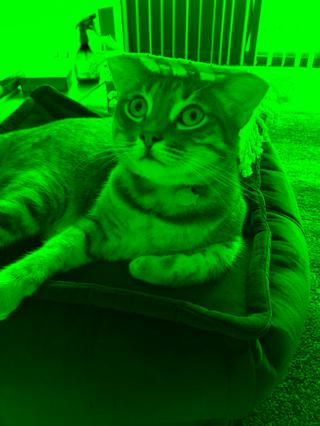

--- blue image ----



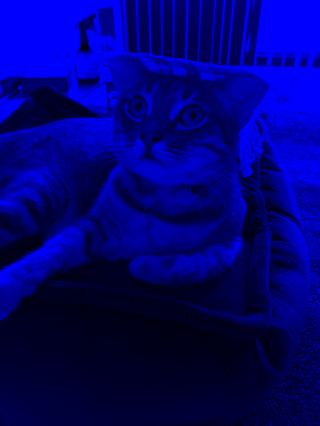

In [4]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Internet", 'label': "Venus", 'file': "VenusWithHat.jpeg"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

# Large image scaled to baseWidth of 320
def scale_image(img):
    baseWidth = 320
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

# PIL image converted to base64
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()

# Set Properties of Image, Scale, and convert to Base64
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    
# Create Red Scale Base64 representation of Image
def image_management_add_html_red(image):
    # Image open return PIL image object
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
    image['data'] = np.array(img_data) # PIL image to numpy array
    image['red_data'] = [] # key/value for data converted to gray scale

    # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
    for pixel in image['data']:
        # create red scale of image
        red = pixel[0]  # average pixel values and use // for integer division
        if len(pixel) > 3:
            image['red_data'].append((red, 0, 0, pixel[3])) # PNG format
        else:
            image['red_data'].append((red, 0, 0))
        # end for loop for pixels
        
    img.putdata(image['red_data'])
    image['html_red'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)

# Create Green Scale Base64 representation of Image
def image_management_add_html_green(image):
    # Image open return PIL image object
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
    image['data'] = np.array(img_data) # PIL image to numpy array
    image['green_data'] = [] # key/value for data converted to gray scale

    # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
    for pixel in image['data']:
        # create green scale of image
        green = pixel[0]  # average pixel values and use // for integer division
        if len(pixel) > 3:
            image['green_data'].append((0, green, 0, pixel[3])) # PNG format
        else:
            image['green_data'].append((0, green, 0))
        # end for loop for pixels
        
    img.putdata(image['green_data'])
    image['html_green'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)

# Create Blue Scale Base64 representation of Image
def image_management_add_html_blue(image):
    # Image open return PIL image object
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
    image['data'] = np.array(img_data) # PIL image to numpy array
    image['blue_data'] = [] # key/value for data converted to gray scale

    # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
    for pixel in image['data']:
        # create red scale of image
        blue = pixel[1]
        if len(pixel) > 3:
            image['blue_data'].append((0, 0, blue, pixel[3])) # PNG format
        else:
            image['blue_data'].append((0, 0, blue))
        # end for loop for pixels
        
    img.putdata(image['blue_data'])
    image['html_blue'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)

# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # Use numpy to concatenate two arrays
    images = image_data()
    
    # Display meta data, scaled view, and grey scale for each image
    for image in images:
        image_management(image)
        print("---- meta data -----")
        print(image['label'])
        print(image['source'])
        print(image['format'])
        print(image['mode'])
        print("Original size: ", image['size'])
        print("Scaled size: ", image['scaled_size'])
        
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("--- red image ----")
        image_management_add_html_red(image)
        display(HTML(image['html_red'])) 

        print("--- green image ----")
        image_management_add_html_green(image)
        display(HTML(image['html_green'])) 

        print("--- blue image ----")
        image_management_add_html_blue(image)
        display(HTML(image['html_blue'])) 
    print()